# Introduction to Digital agro 

## Crop simulation models

____

### Mikhail Gasanov

E-mail: Mikhail.Gasanov[a]skoltech.ru

tg:@misha_grol


<img src="http://drive.google.com/uc?export=view&id=1Pm5Zysv5PxYcTAQDuPe0LNz_zbE0msEW">


## Clone utils and files from GitHub

In [2]:
# !git clone https://github.com/EDSEL-skoltech/Intro_to_Digital_Agriculture.git
# %cd ./Intro_to_Digital_Agriculture/Crop_models 
# !pip install SALib
# !pip install git+https://github.com/mishagrol/pcse

# How to start with PCSE/WOFOST model

_____

### Documentation: [PCSE](https://pcse.readthedocs.io/)

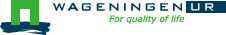



In [1]:
%matplotlib inline
import sys, os
import pcse
import pandas as pd
import matplotlib
import yaml
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

Platform not recognized, using system temp directory for PCSE settings.
Platform not recognized, using system temp directory for PCSE settings.


This notebook was built with:
python version: 3.6.11 | packaged by conda-forge | (default, Aug  5 2020, 20:19:23) 
[GCC Clang 10.0.1 ] 
PCSE version: 5.4.2


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
wofostPP = pcse.start_wofost(mode="wlp")

You have just successfully initialized a PCSE/WOFOST object in the Python interpreter, which is in its initial state and waiting to do some simulation. We can now advance the model state for example with 1 day:


In [4]:
wofostPP.run()

Advancing the crop simulation with only 1 day, is often not so useful so the number of days to simulate can be specified as well:

In [5]:
wofostPP.run(days=10)

## Getting information about state and rate variables
Retrieving information about the calculated model states or rates can be done with the `get_variable()` method on a PCSE object. For example, to retrieve the leaf area index value in the current model state you can do:

### Leaf Area Index 


<img src="http://drive.google.com/uc?export=view&id=14nRP6TBQJLnIQ9Tv_HEvpvIvCe9gnXOO">

In [6]:
# Leaf Area Index at this date
print(wofostPP.day)
print('LAI', wofostPP.get_variable('LAI'))

2000-01-12
LAI 0.2870809817505803


The `get_variable()` method can retrieve any state or rate variable that is defined somewhere in the model. 

Finally, we can finish the crop season by letting it run until the model terminates because the crop reaches maturity or the harvest date:

In [7]:
wofostPP.run_till_terminate()

## Retrieving and displaying WOFOST output
We can retrieve the results of the simulation at each time step using  `get_output()`. In python terms this returns a list of dictionaries, one dictionary for each time step of the the simulation results. Each dictionary contains the key:value pairs of the state or rate variables that were stored at that time step.



In [8]:
output = wofostPP.get_output()

The most convenient way to handle the output from WOFOST is to used the `pandas` module to convert it into a dataframe. Pandas DataFrames can be converted to a variety of formats including excel, CSV or database tables.

In [9]:
df_crop = pd.DataFrame(output).set_index('day')

In [10]:
summary_output = wofostPP.get_summary_output()
msg = "Reached maturity at {DOM} with total biomass {TAGP:.1f} kg/ha, " \
      "a yield of {TWSO:.1f} kg/ha with a maximum LAI of {LAIMAX:.2f}."
for crop_cycle in summary_output:
    print(msg.format(**crop_cycle))

Reached maturity at 2000-05-31 with total biomass 15261.8 kg/ha, a yield of 7179.8 kg/ha with a maximum LAI of 6.13.


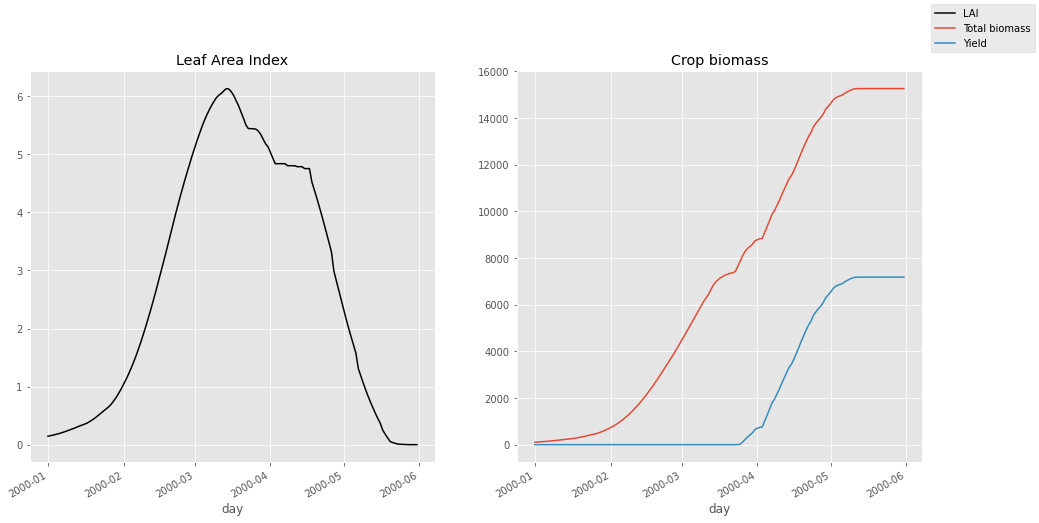

In [11]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
df_crop.LAI.plot(ax=axis1, label="LAI", color='k')
df_crop.TAGP.plot(ax=axis2, label="Total biomass")
df_crop.TWSO.plot(ax=axis2, label="Yield")
axis1.set_title("Leaf Area Index")
axis2.set_title("Crop biomass")
fig.autofmt_xdate()
r = fig.legend()

# Running PCSE/WOFOST with custom input data

This Jupyter notebook will show you how to read inputs from files for running PCSE/WOFOST.

thanks to **Allard de Wit**

**Prerequisites for running this notebook**

Several packages need to be installed for running PCSE/WOFOST:

  1. `PCSE` and its dependencies. See the [PCSE user guide](http://pcse.readthedocs.io/en/stable/installing.html) for more information;
  2. The `pandas` module for processing and storing WOFOST output;
  3. The `matplotlib` module for generating charts

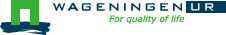



## Reading model parameters
### Crop parameters

In [12]:
data_dir = 'data/'

In [13]:
from pcse.fileinput import CABOFileReader
cropfile = os.path.join(data_dir, 'crop', 'SUG0601.crop')
cropdata = CABOFileReader(cropfile)

In [14]:
#potato
from pcse.fileinput import CABOFileReader
cropfile_potato = os.path.join(data_dir, 'crop', 'POT701.CAB')
cropdata_potato = CABOFileReader(cropfile_potato)

In [15]:
# Number of parameters for our crop 
len(cropdata_potato)

63

### Soil parameters
The soildata dictionary provides the parameter name/value pairs related to the soil type and soil physical properties. The number of parameters is variable depending on the soil water balance type that is used for the simulation. For this example, we will use the water balance for freely draining soils and use the soil file for medium fine sand: `ec3.soil`. This file is also taken from the soil files in the [WOFOST Control Centre](http://www.wageningenur.nl/wofost).

In [17]:
soilfile = os.path.join(data_dir, 'soil', 'ec3.soil')
soildata = CABOFileReader(soilfile)
print(soildata)

** $Id: ec3.new 1.2 1997/09/18 17:33:54 LEM release $
**
** SOIL DATA FILE for use with WOFOST Version 5.0, June 1990
**
** EC3-medium fine
------------------------------------
SMW: 0.104 <class 'float'>
SMFCF: 0.3 <class 'float'>
SM0: 0.41 <class 'float'>
CRAIRC: 0.06 <class 'float'>
K0: 25.586 <class 'float'>
SOPE: 1.47 <class 'float'>
KSUB: 1.47 <class 'float'>
SPADS: 0.1 <class 'float'>
SPODS: 0.03 <class 'float'>
SPASS: 0.2 <class 'float'>
SPOSS: 0.05 <class 'float'>
DEFLIM: -0.3 <class 'float'>
RDMSOL: 120 <class 'int'>
SOLNAM: EC3-medium fine <class 'str'>
SMTAB: [-1.0, 0.41, 1.0, 0.398, 1.3, 0.389, 1.491, 0.38, 2.0, 0.34, 2.4, 0.287, 2.7, 0.241, 3.4, 0.148, 4.204, 0.104, 6.0, 0.09] <class 'list'>
CONTAB: [0.0, 1.408, 1.0, 0.167, 1.3, -0.215, 1.491, -0.638, 1.7, -0.854, 2.0, -1.155, 2.4, -1.796, 2.7, -2.26, 3.0, -2.745, 3.4, -3.357, 3.7, -3.824, 4.0, -4.276, 4.204, -4.678] <class 'list'>



### Site parameters

The site parameters provide ancillary parameters that are not related to the crop or the soil. Examples are the initial conditions of the water balance such as the initial soil moisture content (WAV) and the initial and maximum surface storage (SSI, SSMAX). Also the atmospheric $CO_{2}$ 
concentration is a typical site parameter. For the moment, we can define these parameters directly on the Python commandline as a simple python dictionary. However, it is more convenient to use the `WOFOST71SiteDataProvider` that documents the site parameters and provides sensible defaults:

In [18]:
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=100, CO2=360)
print(sitedata)

{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 100.0, 'SMLIM': 0.4, 'CO2': 360.0}


### Packaging all parameters
Finally, we need to pack the different sets of parameters into one variable using the `ParameterProvider`. This is needed because PCSE expects one variable that contains all parameter values. Using this approach has the additional advantage that parameter value can be easily overridden in case of running multiple simulations with slightly different parameter values:

In [19]:
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)

## Agromanagement
The agromanagement inputs provide the start date of the agricultural campaign, the start_date/start_type of the crop simulation, the end_date/end_type of the crop simulation and the maximum duration of the crop simulation. The latter is included to avoid unrealistically long simulations for example as a results of a too high temperature sum requirement.

The agromanagement inputs are defined with a special syntax called [YAML](http://yaml.org/) which allows to easily create more complex structures which is needed for defining the agromanagement. The agromanagement file for sugar beet in Wageningen `sugarbeet_calendar.agro` can be read with the `YAMLAgroManagementReader`:

In [23]:
from pcse.fileinput import YAMLAgroManagementReader
#crop rotation for Moscow region
agromanagement_file = os.path.join(data_dir, 'agro', 'sugarbeet_calendar_Moscow_short.agro')
#agromanagement_file = os.path.join(data_dir, 'agro', 'sugarbeet_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2019-06-01:
    CropCalendar:
      crop_end_date: 2019-10-15
      crop_end_type: harvest
      crop_name: sugar-beet
      crop_start_date: 2019-06-02
      crop_start_type: emergence
      max_duration: 300
      variety_name: sugar-beet-601
    StateEvents: null
    TimedEvents:
    - comment: All fertilizer amounts in kg/ha
      event_signal: apply_npk
      events_table:
      - 2019-06-22:
          K_amount: 122
          N_amount: 128
          P_amount: 25
      name: Timed N/P/K application table



We can create a crop rotation in the model


In [24]:
K_kg = 60
P_kg = 60
N_kg = 120
year=2017

yaml_agro = f"""
- {year}-05-01:
    CropCalendar:
        crop_name: 'sugar-beet'
        variety_name: 'sugar-beet-601'
        crop_start_date: {year}-05-20
        crop_start_type: sowing
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 250
    TimedEvents:
    -   event_signal: apply_npk
        name:  Timed N/P/K application table
        comment: All fertilizer amounts in kg/ha
        events_table:
        - {year}-06-22: {{N_amount : {N_kg}, P_amount: {P_kg}, K_amount: {K_kg}}}
    StateEvents: null
"""
agromanagement = yaml.safe_load(yaml_agro)
print(yaml_agro)
#crop_end_date: {year_date_1}-11-15


- 2017-05-01:
    CropCalendar:
        crop_name: 'sugar-beet'
        variety_name: 'sugar-beet-601'
        crop_start_date: 2017-05-20
        crop_start_type: sowing
        crop_end_date: 
        crop_end_type: maturity
        max_duration: 250
    TimedEvents:
    -   event_signal: apply_npk
        name:  Timed N/P/K application table
        comment: All fertilizer amounts in kg/ha
        events_table:
        - 2017-06-22: {N_amount : 120, P_amount: 60, K_amount: 60}
    StateEvents: null



## Daily weather observations
Daily weather variables are needed for running the simulation. There are several data providers in PCSE for reading weather data, see the section on [weather data providers](http://pcse.readthedocs.io/en/stable/reference_guide.html#weather-data-providers) to get an overview.

For this example we will use weather data from an excel file which provides daily weather data for Wageningen for the period 2004 to 2008. We will read the data from the file using the ExcelWeatherDataProvider:

### NASA Weather Data Provider from NASA [DataBase](https://power.larc.nasa.gov/)

In [1]:
#NASA Weather system

#Sometimes it does not work (server), upload excel file
from pcse.db import NASAPowerWeatherDataProvider

Platform not recognized, using system temp directory for PCSE settings.
Platform not recognized, using system temp directory for PCSE settings.


In [26]:
latitude = 51
longitude = 5

weather = NASAPowerWeatherDataProvider(latitude, longitude, force_update=True)


In [27]:
print(weather)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (FP-IT) 0.5 x 0.5 Degree Daily Averaged Data
----Site characteristics----
Elevation:   38.5
Latitude:  51.000
Longitude:  5.000
Data available for 1983-07-01 - 2021-02-07
Number of missing days: 6



### Problems with missing days (~1-5 %)

In [28]:
def weather_loader(latitude, longitude):
    
    path = './data/meteo/'
    #API request to NASA database
    weather = NASAPowerWeatherDataProvider(latitude, longitude, force_update=True)

    # Print done if downloaded
    print('____DONE_____','latitude',latitude, 'longitude',longitude,'____')

    # export pcse.weather format to pandas df
    df_weather = pd.DataFrame(weather.export())


    #print('initial number of days:', len(df_weather))

    #create full range of dates
    r = pd.date_range(start=df_weather.DAY.min(), end=df_weather.DAY.max())


    #extend range of dates
    full_range_weather = df_weather.set_index('DAY').reindex(r).rename_axis('DAY').reset_index()
    missing_days = (full_range_weather.isna()).sum().sum()

    print('num_of_missing_days', missing_days)

    #fill weather with fill forward method in pandas
    filled_weather = full_range_weather.fillna(method='ffill', axis=0)

    #save as csv file

    filled_weather=filled_weather[['DAY', 'IRRAD', 'TMIN', 'TMAX', 'VAP', 'WIND', 'RAIN']]
    filled_weather['SNOWDEPTH'] = 'NaN'
    filled_weather[['IRRAD']] = filled_weather[['IRRAD']]/1000.
    filled_weather[['VAP']] = filled_weather[['VAP']]/10.
    filled_weather.DAY=filled_weather.DAY.dt.strftime('%Y%m%d')


    text = open(path+"pattern.csv", "r")
    text = ''.join([i for i in text]).replace("1111", str(weather.longitude))
    text = ''.join([i for i in text]).replace("2222", str(weather.latitude))
    text = ''.join([i for i in text]).replace("3333", str(weather.elevation))
    text = ''.join([i for i in text]).replace("4444", str(weather.angstA))
    text = ''.join([i for i in text]).replace("5555", str(weather.angstB))
    x = open(path+f'NASA_weather_latitude_{latitude}_longitude_{longitude}.csv',"w")
    x.writelines(text)
    x.close()

    path_to_save_csv_file = path+f'NASA_weather_latitude_{latitude}_longitude_{longitude}.csv'
    filled_weather.to_csv(path_to_save_csv_file, mode='a', header=False, index=False)

    #add info to weather database and save it to csv


    #LOAD WEATHER as csv file
    weather = pcse.fileinput.CSVWeatherDataProvider(path_to_save_csv_file)  
    return weather

In [29]:
weather = weather_loader(55,55)

____DONE_____ latitude 55 longitude 55 ____
num_of_missing_days 195


#### Sometimes NASA POWER weather server does not work and may return an error to the weather request, in which case you can use the weather from the local folder using CSV

In [2]:
from pcse.fileinput import csvweatherdataprovider

In [4]:
from pcse.fileinput import csvweatherdataprovider
weather = csvweatherdataprovider.CSVWeatherDataProvider('data/meteo/NASA_weather_latitude_52.0_longitude_5.0.csv')

In [5]:
df_weather = pd.DataFrame(weather.export())

Text(0.5, 1.0, 'T°C Max')

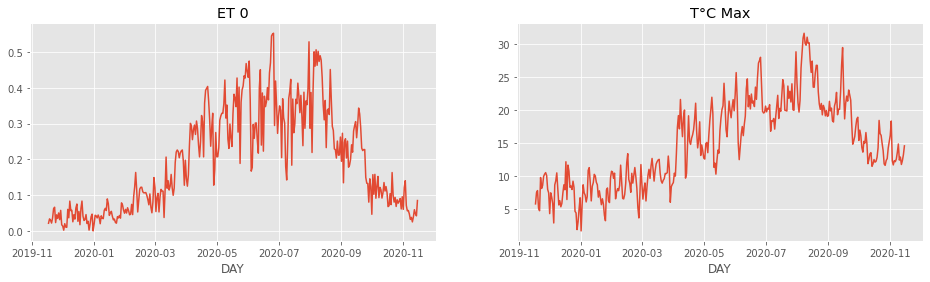

In [6]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
df_weather.set_index('DAY')['ET0'][-365:].plot(ax=ax1, label='ET0')
df_weather.set_index('DAY')['TMAX'][-365:].plot(ax=ax2, label='T MAX')
ax1.set_title('ET 0')
ax2.set_title('T°C Max')

## Importing, initializing and running a PCSE model

Internally, PCSE uses a simulation engine to run a crop simulation. This engine takes a configuration file that specifies the components for the crop, the soil and the agromanagement that need to be used for the simulation. So any PCSE model can be started by importing the engine and initializing it with a given configuration file and the corresponding parameters, weather data and agromanagement.

However, as many users of PCSE only need a particular configuration (for example the WOFOST model for potential production), preconfigured Engines are provided in `pcse.models`. For the sugarbeet example we will import the WOFOST model for water-limited simulation under freely draining soil conditions:

In [52]:
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, weather, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2018-01-21,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.014248,120.0,0.154055,18.486627
2018-01-22,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.023385,120.0,0.153960,18.475179
2018-01-23,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.023202,120.0,0.154166,18.499908
2018-01-24,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.028208,120.0,0.154058,18.486978
2018-01-25,1.638268,4.361832,13001.94206,8070.729387,2295.014434,2636.198239,2072.527759,0.026663,120.0,0.153811,18.457348


We can then run the simulation and retrieve the time series of daily simulation output using the get_output() method on the WOFOST object. Finally, we convert the simulation results to a pandas dataframe:

In [53]:
summary_output = wofsim.get_summary_output()

In [54]:
wofsim.get_summary_output()

[{'DVS': 1.6382678571428573,
  'LAIMAX': 4.361831916594967,
  'TAGP': 13001.942059594281,
  'TWSO': 8070.729386700372,
  'TWLV': 2295.0144341030245,
  'TWST': 2636.198238790885,
  'TWRT': 2072.5277589248244,
  'CTRAT': 17.5463787829338,
  'RD': 120.0,
  'DOS': datetime.date(2017, 5, 20),
  'DOE': datetime.date(2017, 6, 1),
  'DOA': datetime.date(2017, 7, 23),
  'DOM': None,
  'DOH': None,
  'DOV': None}]

In [55]:
msg = "Reached maturity at {DOM} with total biomass {TAGP} kg/ha "\
"and a yield of {TWSO} kg/ha."
print(msg.format(**summary_output[0]))

Reached maturity at None with total biomass 13001.942059594281 kg/ha and a yield of 8070.729386700372 kg/ha.


In [2]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["DVS", "TWSO", "LAI", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
fig.autofmt_xdate()

NameError: name 'plt' is not defined

### More examples 

https://github.com/ajwdewit/pcse_notebooks